In [71]:
import bilby
import icarogw
import h5py
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import rcParams
from scipy.stats import gaussian_kde
import seaborn as sns
import icarogw
import warnings
warnings.filterwarnings("ignore")

In [72]:
rcParams['font.family'] = 'serif'
rcParams['font.serif'] = ['Palatino Linotype', 'Palatino', 'TeX Gyre Pagella', 'Times New Roman']
rcParams['font.sans-serif'] = ['Helvetica', 'Arial']
rcParams['mathtext.fontset'] = 'custom'
rcParams['mathtext.rm'] = 'Palatino'
rcParams['mathtext.it'] = 'Palatino:italic'
rcParams['mathtext.bf'] = 'Palatino:bold'

#matplotlib.rc('xtick', labelsize = 16) 
#matplotlib.rc('ytick', labelsize = 16)
my_fontsize=24

In [73]:
my_color = '#2f4f4f'
my_color2 = '#f6b26b'

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'serif' not found because none of the following families were found: Palatino Linotype, Palatino, TeX Gyre Pagella, Times New Roman


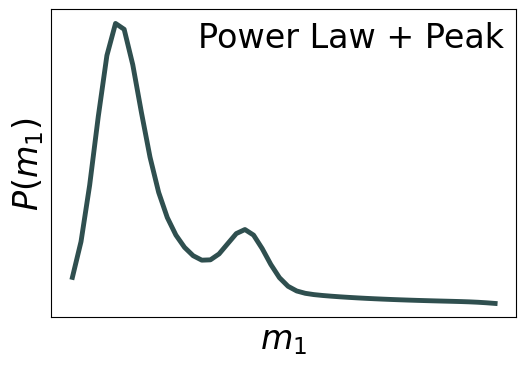

In [74]:
mm = np.linspace(0, 85, 50)
M1, M2 = np.meshgrid(mm,mm)

mass_wrap = icarogw.wrappers.massprior_PowerLawPeak()
mass_wrap=icarogw.wrappers.m1m2_conditioned_lowpass(mass_wrap)


n_posterior_samples = 100_000
m1_prob, m2_prob  = np.zeros((n_posterior_samples, len(mm))), np.zeros((n_posterior_samples, len(mm)))

mass_wrap.update(**{'alpha':2.,'beta':1.,'mmin':5.,'mmax':85.,'delta_m':5.,'mu_g':35.,'sigma_g':1.,'lambda_peak':0.1})
pdf=mass_wrap.pdf(M1,M2)
    
m1_prob[0, :] = np.trapz(pdf,mm,axis=0)
m2_prob[0, :] = np.trapz(pdf,mm,axis=1)

fig, ax = plt.subplots(figsize=(6, 4))
# smooth with kde
kde = gaussian_kde(mm, weights=m1_prob[0, :], bw_method=0.25)
sns.lineplot(x = mm, y = kde(mm), color=my_color, linewidth=3.5)
plt.xlabel('$m_1$', fontsize=my_fontsize)
plt.ylabel('$P(m_1)$', fontsize=my_fontsize)
# Remove all ticks and labels
ax.tick_params(axis='both', which='both', bottom=False, top=False, left=False, right=False, labelbottom=False, labelleft=False)
plt.legend(title='Power Law + Peak', title_fontsize=my_fontsize, frameon=False)
plt.savefig('plots/power_law_peak.pdf', bbox_inches='tight')
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


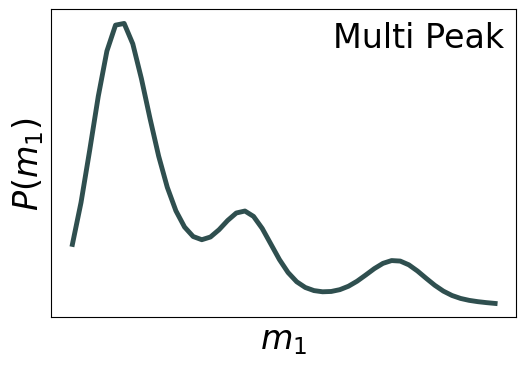

In [75]:
mm = np.linspace(0, 85, 50)
M1, M2 = np.meshgrid(mm,mm)

mass_wrap = icarogw.wrappers.massprior_MultiPeak()
mass_wrap=icarogw.wrappers.m1m2_conditioned_lowpass(mass_wrap)


n_posterior_samples = 100_000
m1_prob, m2_prob  = np.zeros((n_posterior_samples, len(mm))), np.zeros((n_posterior_samples, len(mm)))

mass_wrap.update(**{'alpha':2.,'beta':1.,'mmin':5.,'mmax':85.,'delta_m':5.,'mu_g_low':35.,'sigma_g_low':1.,
                    'lambda_g_low':0.6, 'mu_g_high':65.,'sigma_g_high':3.,'lambda_g':0.2})
pdf=mass_wrap.pdf(M1,M2)
    
m1_prob[0, :] = np.trapz(pdf,mm,axis=0)
m2_prob[0, :] = np.trapz(pdf,mm,axis=1)

fig, ax = plt.subplots(figsize=(6, 4))
# smooth with kde
kde = gaussian_kde(mm, weights=m1_prob[0, :], bw_method=0.25)
sns.lineplot(x = mm, y = kde(mm), color=my_color, linewidth=3.5)
plt.xlabel('$m_1$', fontsize=my_fontsize)
plt.ylabel('$P(m_1)$', fontsize=my_fontsize)
# Remove all ticks and labels
ax.tick_params(axis='both', which='both', bottom=False, top=False, left=False, right=False, labelbottom=False, labelleft=False)
plt.legend(title='Multi Peak', title_fontsize=my_fontsize, frameon=False)
plt.savefig('plots/multi_peak.pdf', bbox_inches='tight')
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


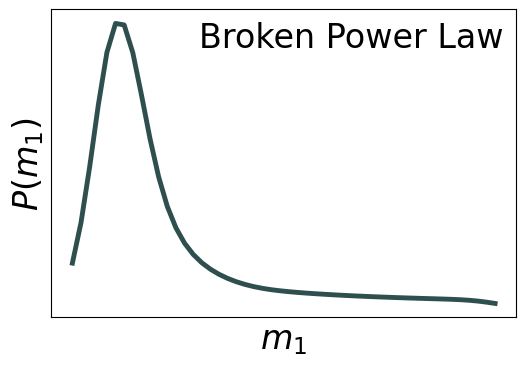

In [76]:
mm = np.linspace(0, 85, 50)
M1, M2 = np.meshgrid(mm,mm)

mass_wrap = icarogw.wrappers.massprior_BrokenPowerLaw()
mass_wrap=icarogw.wrappers.m1m2_conditioned_lowpass(mass_wrap)


n_posterior_samples = 100_000
m1_prob, m2_prob  = np.zeros((n_posterior_samples, len(mm))), np.zeros((n_posterior_samples, len(mm)))

mass_wrap.update(**{'alpha_1':2.,'alpha_2':1.,'beta':3.,'mmin':5.,'mmax':85.,'delta_m':5.,'b':0.4})
pdf=mass_wrap.pdf(M1,M2)
    
m1_prob[0, :] = np.trapz(pdf,mm,axis=0)
m2_prob[0, :] = np.trapz(pdf,mm,axis=1)

fig, ax = plt.subplots(figsize=(6, 4))
# smooth with kde
kde = gaussian_kde(mm, weights=m1_prob[0, :], bw_method=0.25)
sns.lineplot(x = mm, y = kde(mm), color=my_color, linewidth=3.5)
plt.xlabel('$m_1$', fontsize=my_fontsize)
plt.ylabel('$P(m_1)$', fontsize=my_fontsize)
# Remove all ticks and labels
ax.tick_params(axis='both', which='both', bottom=False, top=False, left=False, right=False, labelbottom=False, labelleft=False)
plt.legend(title='Broken Power Law', title_fontsize=my_fontsize, frameon=False)
plt.savefig('plots/broken_power_law.pdf', bbox_inches='tight')
plt.show()